<a href="https://colab.research.google.com/github/22041998/Assign-and-case-study/blob/main/Rainfall_prediction%20project%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>**Rainfall prediction using Predictive Data Modeling with Australian Weather dataset**

---
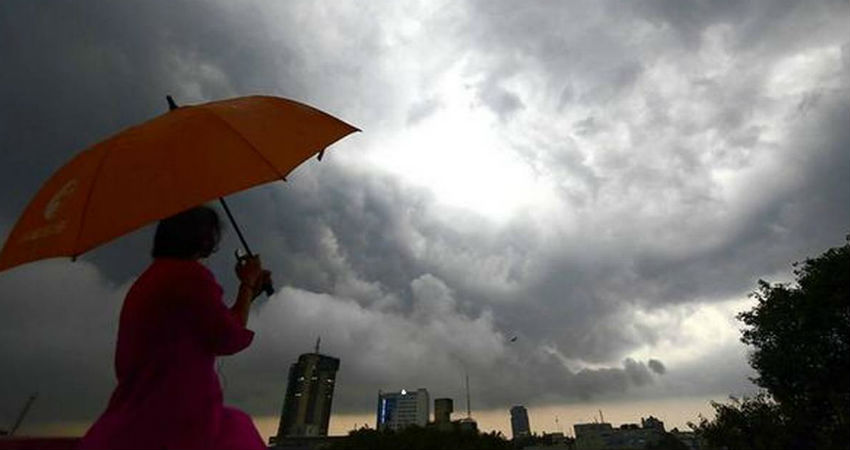


**Norka DSA Batch-5**

**Team members:**
Jomon Joseph, Lekshmi A K, Thomas Joseph

Rainfall Prediction is one of the difficult and uncertain tasks that have a significant impact on human society. Timely and accurate forecasting can proactively help reduce human and financial loss. This study presents a set of experiments that involve the use of common machine learning techniques to create models that can predict whether it will rain tomorrow or not based on the weather data for that day in major cities in Australia.

**Dataset source:** 

[Rainfall Prediction in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) dataset from Kaggle



**Dataset Description**

Date: The date of observation

Location:The common name of the location of the weather station

MinTemp: The minimum temperature in degrees celsius

MaxTemp: The maximum temperature in degrees celsius

Rainfall: The amount of rainfall recorded for the day in mm

Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine: The number of hours of bright sunshine in the day.

WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am: Direction of the wind at 9am

WindDir3pm: Direction of the wind at 3pm

WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am: Humidity (percent) at 9am

Humidity3pm: Humidity (percent) at 3pm

Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many.

Cloud3pm:Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

Temp9am: Temperature (degrees C) at 9am

Temp3pm: Temperature (degrees C) at 3pm

RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

In [ ]:

# importing libraries for doing operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Understanding**

In [ ]:
# Reading the dataset
data = pd.read_csv('/content/drive/MyDrive/DSA Main Project group-13 Batch-5/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Checking the shape of data
data.shape

(145460, 23)

Our dataset has 145460 rows and 23 columns

In [ ]:
# printing all the columns in the dataset
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Checking for duplicated rows
data[data.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


There are no duplicated rows in the dataset

In [ ]:
# Checking data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Checking for missing values
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

We have many missing values in our dataset. We will handle it in the data preprocessing steps.

In [ ]:
# Checking datatypes
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
# Creating a copy of our dataset and converting the target variable to int datatype
df = data.copy()
df.RainTomorrow = df.RainTomorrow.replace({'Yes': 1, 'No': 0})
df['RainTomorrow'].unique()

array([ 0.,  1., nan])

In [ ]:
# Now let's check how many numerical features are there in our data set and print them

# Creating a list of numerical features
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print("The length of numerical variables is", len(numerical_features))

# Display the numerical variables
data[numerical_features].head()

The length of numerical variables is 16


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [ ]:
# Numerical variables are of 2 types- continuous variables and discrete variables
# Let's find out the  discrete numerical variables

# Creating a list of discrete features
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25]
print("Discrete variables count: {}".format(len(discrete_features)))
print("The discrete variables are", discrete_features)

Discrete variables count: 2
The discrete variables are ['Cloud9am', 'Cloud3pm']


In [ ]:
# let's check the value range of discrete variables
data['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9.])

In [ ]:
data['Cloud3pm'].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.,  9.])

In [ ]:
# Creating a list of continuous features
continuous_feature = [feature for feature in numerical_features if feature not in discrete_features]
print('Continuous feature count: {}'.format(len(continuous_feature)))
continuous_feature

Continuous feature count: 14


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
# displaying continuous features
data[continuous_feature].tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0
145459,14.9,NaN,0.0,NaN,NaN,NaN,17.0,17.0,62.0,36.0,1020.2,1017.9,15.0,20.9


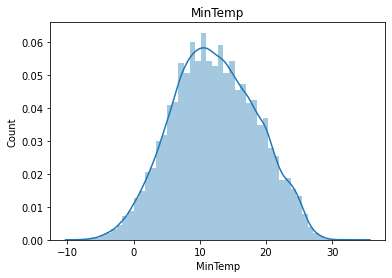

<Figure size 1080x1080 with 0 Axes>

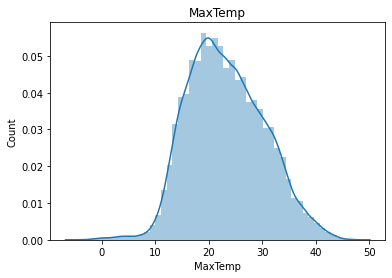

<Figure size 1080x1080 with 0 Axes>

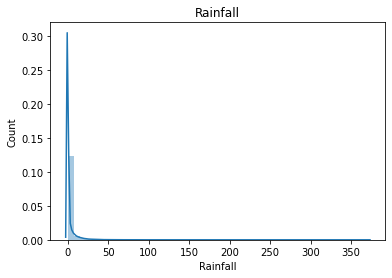

<Figure size 1080x1080 with 0 Axes>

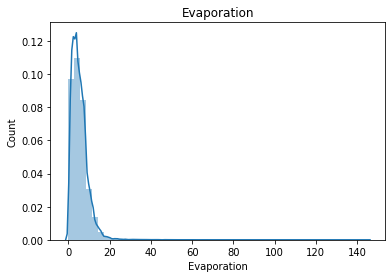

<Figure size 1080x1080 with 0 Axes>

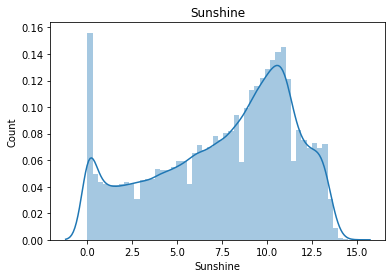

<Figure size 1080x1080 with 0 Axes>

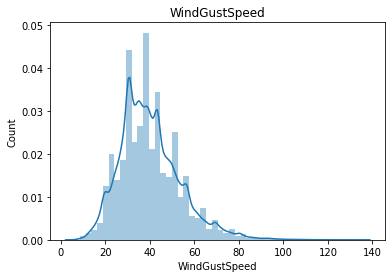

<Figure size 1080x1080 with 0 Axes>

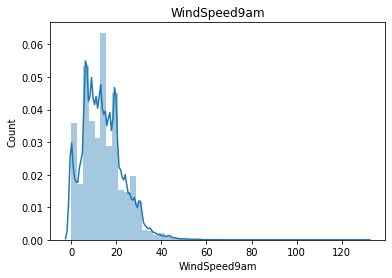

<Figure size 1080x1080 with 0 Axes>

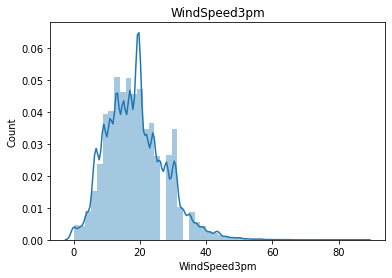

<Figure size 1080x1080 with 0 Axes>

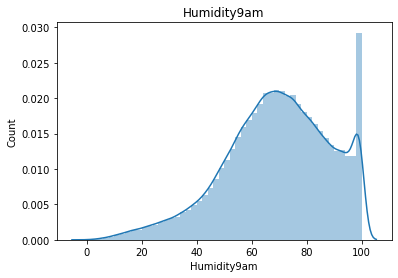

<Figure size 1080x1080 with 0 Axes>

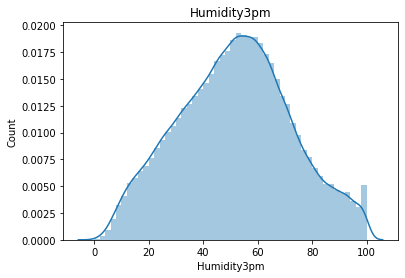

<Figure size 1080x1080 with 0 Axes>

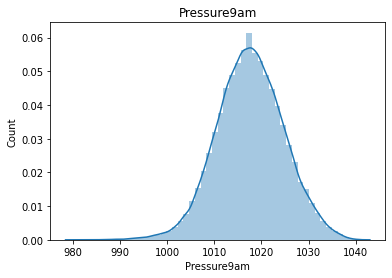

<Figure size 1080x1080 with 0 Axes>

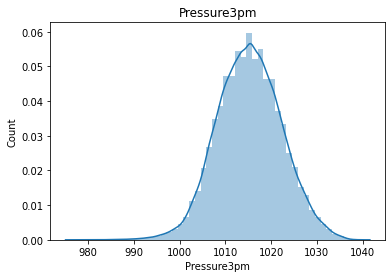

<Figure size 1080x1080 with 0 Axes>

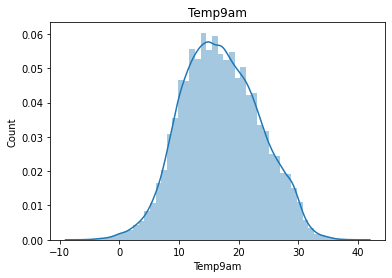

<Figure size 1080x1080 with 0 Axes>

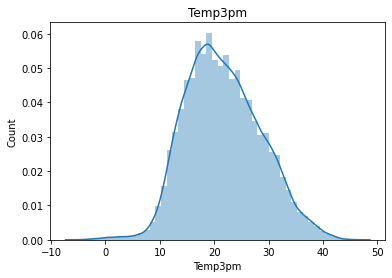

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# Checking the distribution of data
for feature in continuous_feature:
    df=data.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

From the above plot we can see that some features of our data like minimum temperature, maximum temperature,Humidity at 3 pm,pressure at 9 am, pressure at 3pm, temperature at 9am, temperature at 3pm etc. follows normal distribution while some features like Evaporation, Sunshine, windgust speed, humidity 9am, Humidity 3 pm, wind speed 9am, wind speed 3pm, etc are skewed.

In [ ]:
# Now let's check how many categorical features are there in our data set and print them

# Creating a list of categorical features
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print("The length of categorical variables is", len(categorical_features))

# Display the categorical variables
print("The categorical variables are", categorical_features)

The length of categorical variables is 7
The categorical variables are ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Let's change the data type of the column Date
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
data.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [ ]:
# Date column can be split to Year and Month as this will make the dataset more robust and help in the analysis
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [ ]:
# let's check how many unique values are there in each column
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
Year               11
Month              12
dtype: int64

In [ ]:
# Checking statistical summary of numerical features
data[numerical_features].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194,6.398,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221,7.119,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.361,8.478,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468,4.194,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611,3.785,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035,13.607,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043,8.915,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.663,8.810,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.881,19.029,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539,20.796,0.0,37.0,52.0,66.0,100.0


In [ ]:
# Checking statistical summary of numerical features
data[categorical_features].describe().T

,count,unique,top,freq,first,last
Date,145460,3436,2013-11-12 00:00:00,49,2007-11-01,2017-06-25
Location,145460,49,Canberra,3436,NaT,NaT
WindGustDir,135134,16,W,9915,NaT,NaT
WindDir9am,134894,16,N,11758,NaT,NaT
WindDir3pm,141232,16,SE,10838,NaT,NaT
RainToday,142199,2,No,110319,NaT,NaT
RainTomorrow,142193,2,No,110316,NaT,NaT


# **Exploratory Data Analysis**

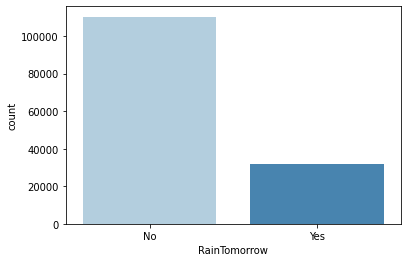

In [ ]:
# First of all let us evaluate the target and find out if our data is imbalanced or not
sns.countplot(x= data["RainTomorrow"], palette = 'Blues')
plt.show()


Looks like the Target variable is imbalanced. It has more ‘No’ values. If data is imbalanced, then it might decrease the performance of the model. As this data is released by the meteorological department of Australia, it doesn’t make any sense when we try to balance the target variable, because the truthfulness of data might decrease. So, let me keep it as it is.

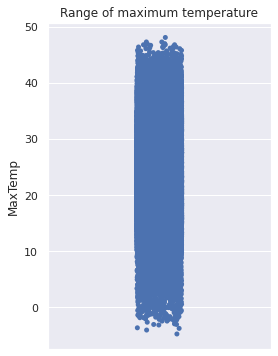

In [ ]:
# We can use strip plots to see the distribution of maximum and minimum temperatures
plt.figure(figsize=(4,6))
plt.title('Range of maximum temperature')
sns.stripplot(y= data['MaxTemp'])
plt.show()

The maximum temperature ranges from about 0°C to 50 °C

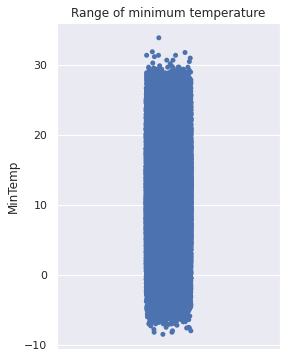

In [ ]:
plt.figure(figsize=(4,6))
plt.title('Range of minimum temperature')
sns.stripplot(y= data['MinTemp'])
plt.show()

The minimum temperature ranges from -10°C to 30°C.

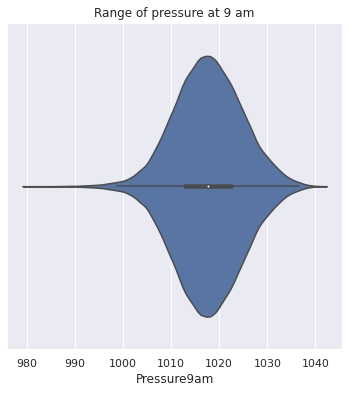

In [ ]:
# We can use strip plots to see the distribution of maximum and minimum temperatures
plt.figure(figsize=(6,6))
plt.title('Range of pressure at 9 am')
sns.violinplot(x=data['Pressure9am'])
plt.show()

The pressure value ranges from 980 hPa to 1040 hPa in the morning.

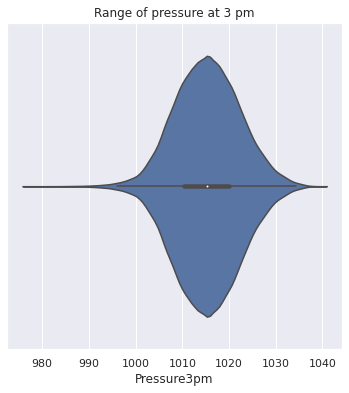

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Range of pressure at 3 pm')
sns.violinplot(x=data['Pressure3pm'])
plt.show()

Range of pressure is almost the same in both morning and evening. It lies in between 975 hPa to 1040 hPa

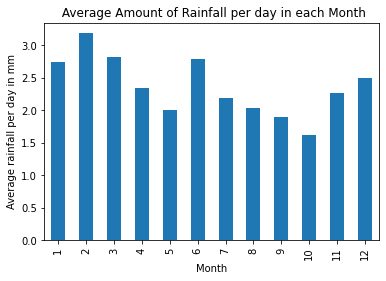

In [ ]:
# Let's plot the amount of rainfall for last few years
data.groupby('Month').mean()['Rainfall'].plot(kind='bar')
plt.title(" Average Amount of Rainfall per day in each Month")
plt.ylabel("Average rainfall per day in mm")
plt.show()

From the above plot we can see that February receives the highest rainfall while the lowest rainfall is in the month of October

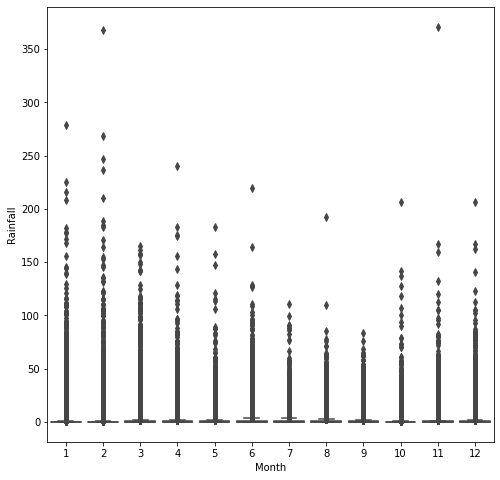

In [ ]:
# Let's check the pattern of rainfall
plt.figure(figsize = (8,8))
sns.boxplot(data['Month'],data['Rainfall'])
plt.show()


From the above plot it's clearly understood that there was an exceptionally high rainfall on some days in the month of February and November.

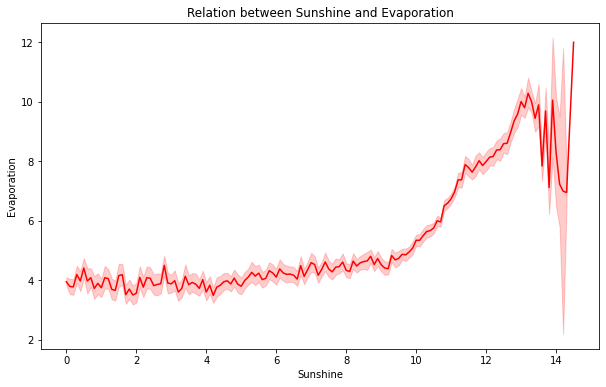

In [ ]:
# Let's check the relation between Sunshine and Evaporation
# let's plot a line graph between them
plt.figure(figsize = (10,6))
plt.title('Relation between Sunshine and Evaporation')
sns.lineplot(data=data,x='Sunshine',y='Evaporation',color='red')
plt.show()

From the above plot we can infer that sunshine and evaporation are almost in direct proportion

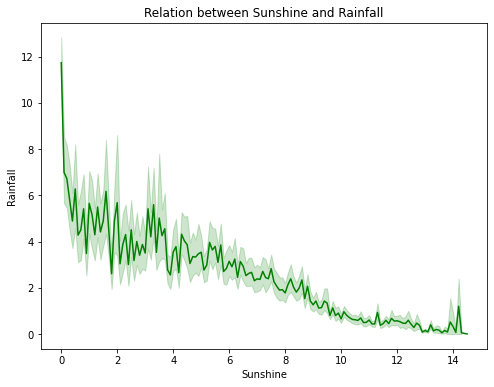

In [ ]:
# Now let's plot a line graph between sunshine and rainfall
plt.figure(figsize = (8,6))
plt.title('Relation between Sunshine and Rainfall')
sns.lineplot(data=data,x='Sunshine',y='Rainfall',color='green')
plt.show()

It's clearly understood that the amount of rainfall and sunshine are in inverse proportion

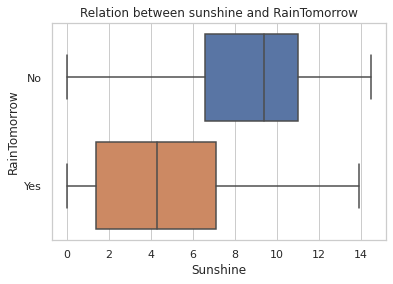

In [ ]:
# Let's see the relation between our target variable and sunshine
df2 = data.copy()
df2.dropna(subset=['RainTomorrow'], inplace=True)
plt.title('Relation between sunshine and RainTomorrow')
sns.boxplot(x = df2['Sunshine'], y = df2['RainTomorrow']);

If there is low sunshine, there are  chances of raining tomorrow  and if the sunshine is high (>8) there are no chances of raining

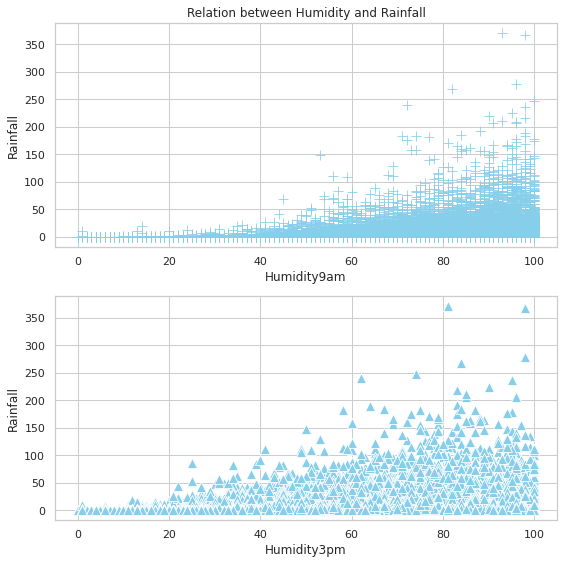

In [ ]:
# Let's plot the relation between humidity  and rainfall
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
sns.set_theme(style="whitegrid")
plt.title('Relation between Humidity and Rainfall')
sns.scatterplot(data=data, x='Humidity9am', y='Rainfall',s=100, color="skyblue", marker="+")

plt.subplot(2,1,2)
sns.set_theme(style="whitegrid")
sns.scatterplot(data=data, x='Humidity3pm', y='Rainfall',s=100, color="skyblue", marker="^")

plt.tight_layout()

From the above plots it's clear that humidity and rainfall are in direct proportion.

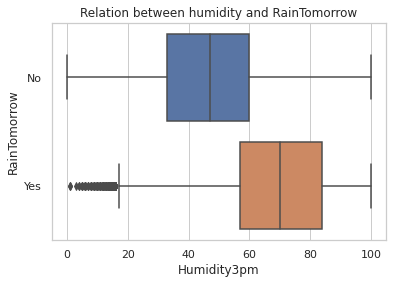

In [ ]:
# Let's plot how humidity depends on our target variable
plt.title('Relation between humidity and RainTomorrow')
sns.boxplot(x = df2['Humidity3pm'], y = df2['RainTomorrow']);

We can see that the chances of raining increases with increase in humidity

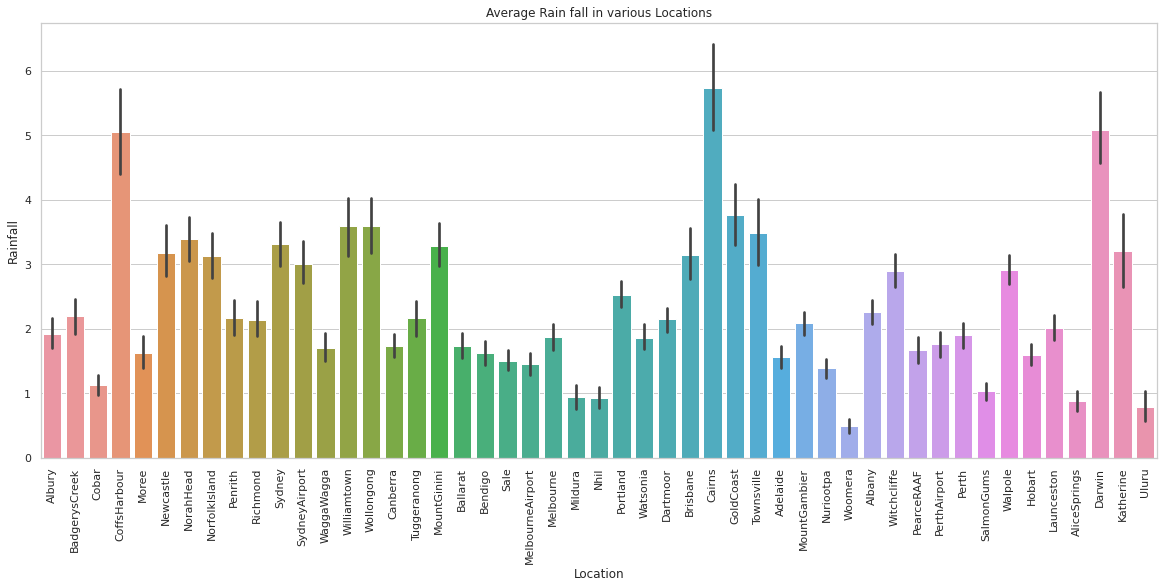

In [ ]:
# Let's plot the average rainfall in all locations and see which area is receiving the highest and lowest rainfall
plt.figure(figsize=(20,8))
sns.barplot(x="Location", y="Rainfall", data=data)
plt.xticks(rotation = 90)
plt.title("Average Rain fall in various Locations")
plt.show()

From the above plot we can see that Cairns is receiving the highest rainfall and Woomera has the lowest rainfall

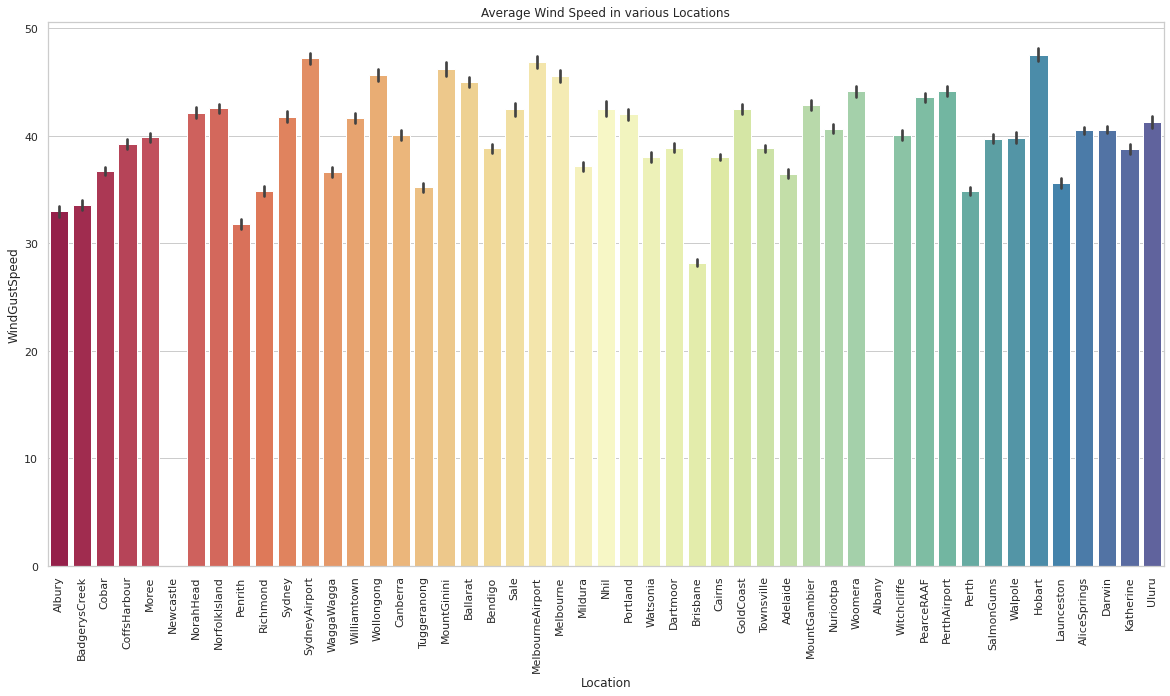

In [ ]:
# Now let's plot the average wind speed in each location.
plt.figure(figsize=(20,10))
sns.barplot(x="Location", y="WindGustSpeed",data = data, palette ="Spectral" )
plt.xticks(rotation = 90)
plt.title("Average Wind Speed in various Locations")
plt.show()

Majority of the loactions have wind speed greater than 50. For example Hobart, Sydney Airport, Melbourne Airport etc.

In [ ]:
# Converting boolean values to int
df = data.copy()
df.RainToday = df.RainToday.replace({'Yes': 1, 'No': 0})
df.RainTomorrow = df.RainTomorrow.replace({'Yes': 1, 'No': 0})

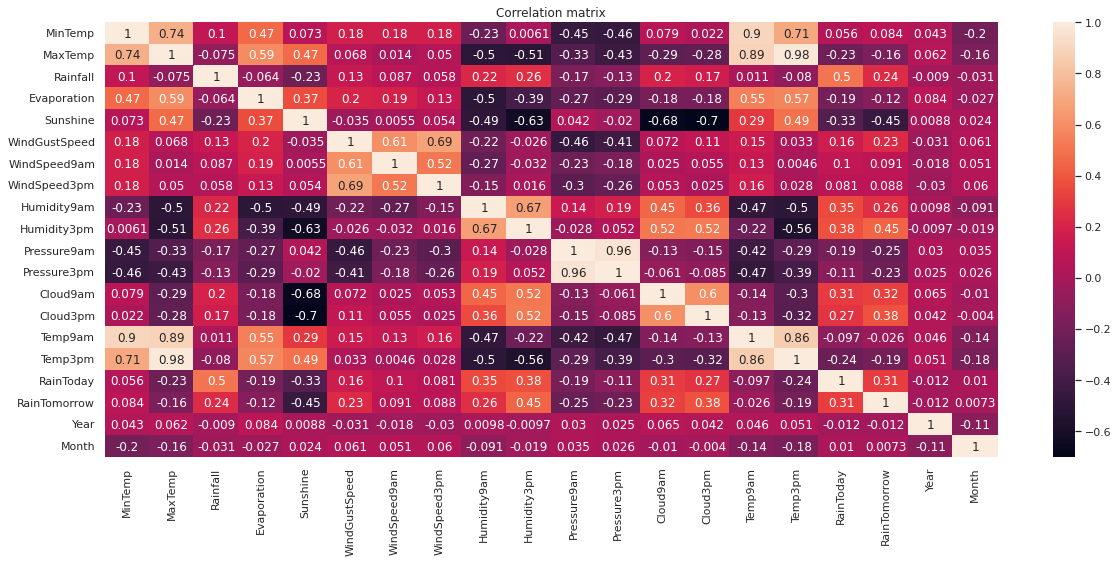

In [ ]:
# Checking the correlation between the features
plt.figure(figsize=(20,8))
plt.title("Correlation matrix")
sns.heatmap(df.corr(), annot =True)
plt.show()

From the above correlation matrix we can see that our target variable mainly depends on the factors like humidity 3pm, cloud 3pm, Rain today, rainfall and wind speed

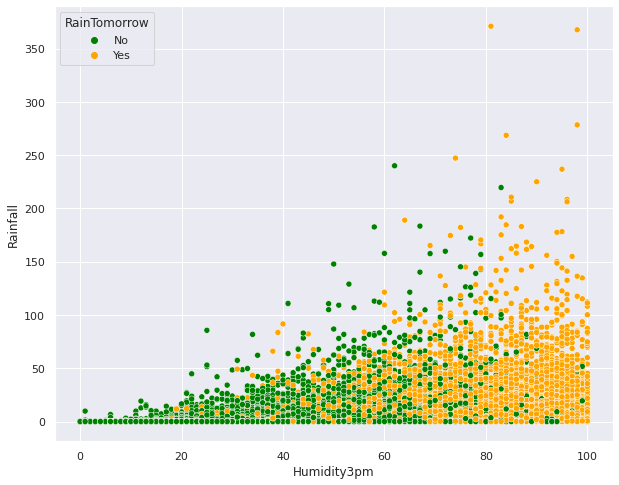

In [ ]:
# Let's check how our target varible related to humidity and rainfall
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
sns.color_palette("YlOrBr", as_cmap=True)
sns.scatterplot(data=data, x='Humidity3pm', y='Rainfall', hue="RainTomorrow",palette=['green','orange']);

From the above plot we can see that the humidity and rainfall are in direct proportion and our target variable depends on both the factors.

<Figure size 1080x720 with 0 Axes>

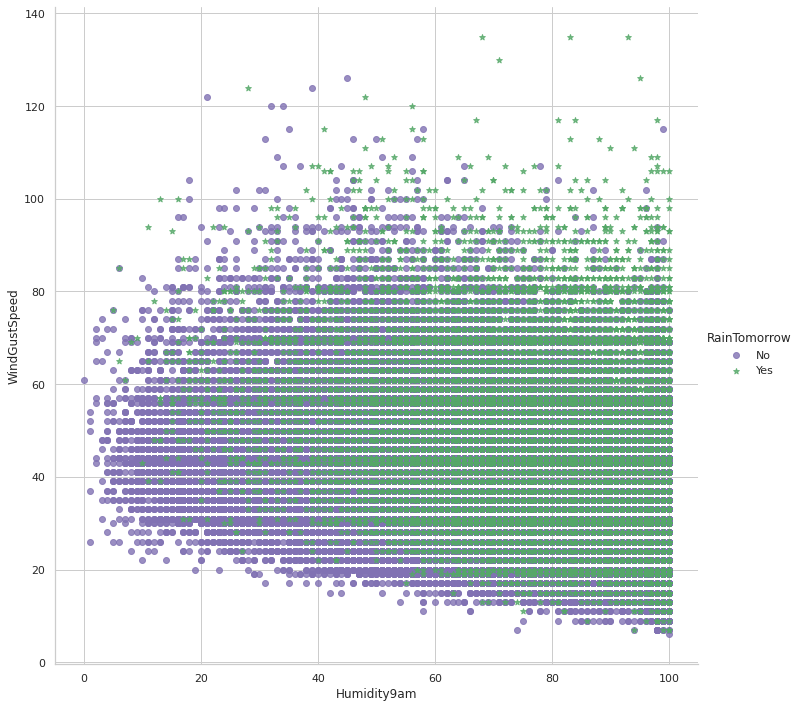

In [ ]:
# Let's do an lmplot to see how our target is related to windgust speed and humidity 9am
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.lmplot(x='Humidity9am', y='WindGustSpeed', markers=['o','*'], 
           hue='RainTomorrow',data=data.loc[data['RainTomorrow'].isin(['Yes', 'No'])]
           ,fit_reg=False,palette=dict(Yes="g", No="m"), height =10, );

Chances of rainfall mainly depends on humidity than the wind speed. It can be observed that there are high chances of rain when the humidity is high eventhough the windspeed is less than 20kmph.

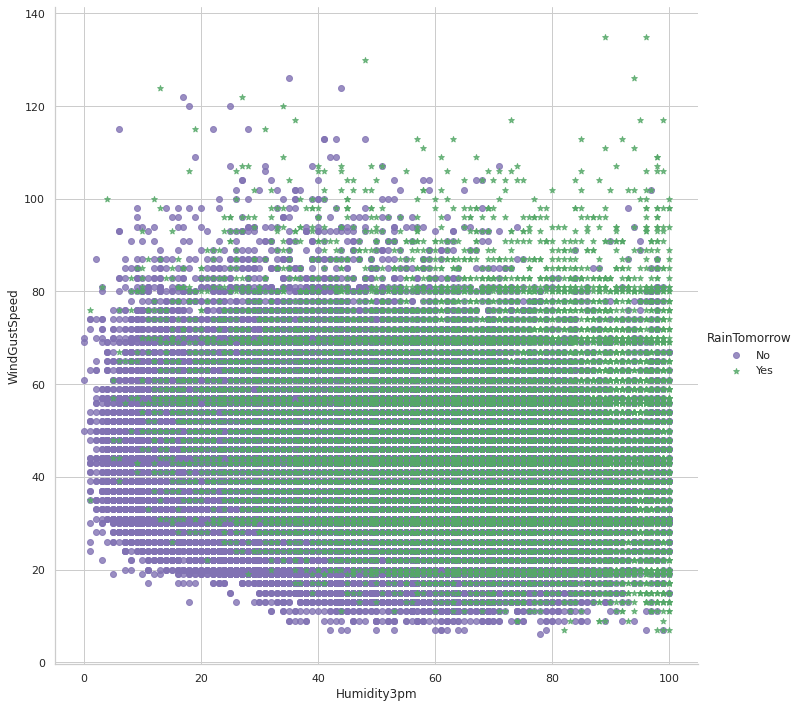

In [ ]:
# Let's check the same with humidity 3pm
sns.set_style("whitegrid")
sns.lmplot(x='Humidity3pm', y='WindGustSpeed', markers=['o','*'],
           hue='RainTomorrow',data=data.loc[data['RainTomorrow'].isin(['Yes', 'No'])]
           ,fit_reg=False, palette=dict(Yes="g", No="m"), height =10, )

It can be seen that high humidity in the evening is a key factor in prediciting the chances of raining.

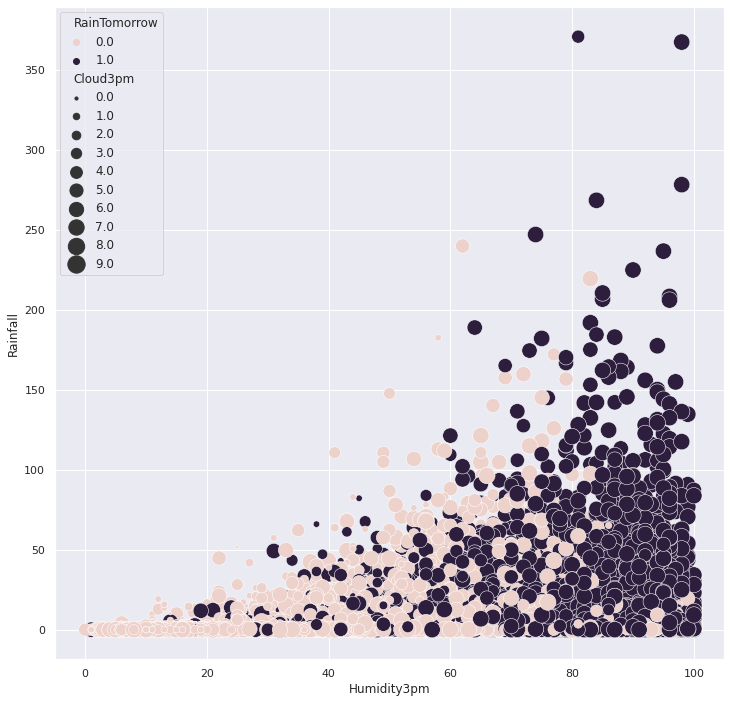

In [ ]:
# Analysing how cloudy is the sky during rainfall and how humidity and cloudy sky influences the chances of rainfall
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,12))
sns.scatterplot(
    data=df, x="Humidity3pm", y="Rainfall", hue="RainTomorrow", size='Cloud3pm',
    sizes=(10, 300), legend="full")
plt.show()

From the plot it's clear that the sky is mostly cloudy when there is high humidity and rainfall also the chances of rainfall a rainfall tomorrow is very high with a cloudy sky.

<Figure size 1080x1080 with 0 Axes>

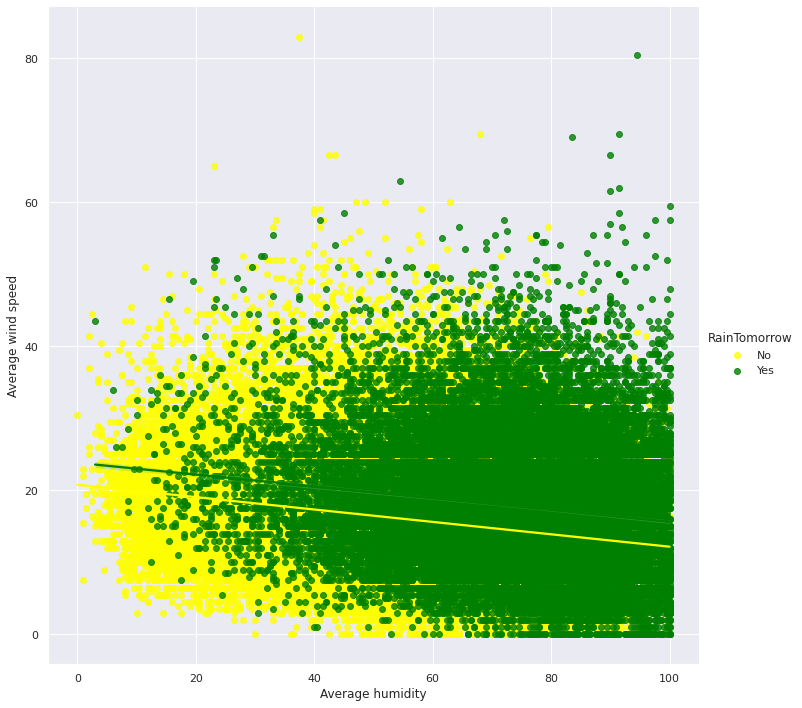

In [ ]:
# Let's find out the average humidity and average wind speed and see how it is related to our target variable
df1 = data.copy()
df1['Average humidity'] = (df1['Humidity9am']+df1['Humidity3pm'])/2
df1['Average wind speed'] = (df1['WindSpeed9am']+df1['WindSpeed3pm'])/2
plt.figure(figsize=(15,15))
sns.lmplot(x='Average humidity', y='Average wind speed', hue='RainTomorrow', palette=dict(Yes="green", No="yellow"),height=10, data=df1)
plt.show()

From this plot it's very clear that humidity is the key factor than the wind speed in predicting rainfall.